In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [5]:
feature = pd.read_csv('datasets/features.csv')
train = pd.read_csv('datasets/train.csv')
stores = pd.read_csv('datasets/stores.csv')

In [6]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


In [7]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
merge_df=pd.merge(train,feature, on=['Store','Date'], how='inner')

In [9]:
merge_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature_x,Fuel_Price_x,MarkDown1_x,MarkDown2_x,MarkDown3_x,...,Temperature_y,Fuel_Price_y,MarkDown1_y,MarkDown2_y,MarkDown3_y,MarkDown4_y,MarkDown5_y,CPI_y,Unemployment_y,IsHoliday_y
0,26,92,2011-08-26,87235.57,False,61.1,3.796,NaN,NaN,NaN,...,61.1,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,False
1,26,36,2011-08-26,605.27,False,61.1,3.796,NaN,NaN,NaN,...,61.1,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,False
2,26,19,2011-08-26,2007.95,False,61.1,3.796,NaN,NaN,NaN,...,61.1,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,False
3,26,55,2011-08-26,5173.58,False,61.1,3.796,NaN,NaN,NaN,...,61.1,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,False
4,26,24,2011-08-26,6000.10,False,61.1,3.796,NaN,NaN,NaN,...,61.1,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,False


In [3]:
df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [10]:
from datetime import datetime as dt
merge_df['DateTimeObj']=[dt.strptime(x,'%Y-%m-%d') for x in list(merge_df['Date'])]
merge_df['DateTimeObj'].head()

0   2011-08-26
1   2011-08-26
2   2011-08-26
3   2011-08-26
4   2011-08-26
Name: DateTimeObj, dtype: datetime64[ns]

C:\Users\HP\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


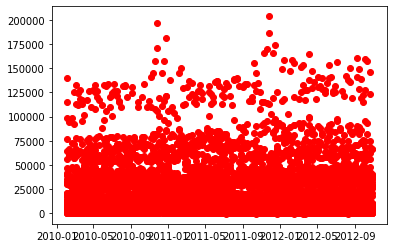

In [11]:
plt.plot(merge_df[(merge_df.Store==1)].DateTimeObj, merge_df[(merge_df.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [15]:
weeklysales=merge_df.groupby(['Store','Date'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysales.head()

Store  Date      
1      2010-02-05    1112466.82
       2010-02-12     792483.02
       2010-02-19     799708.54
       2010-02-26     968441.71
       2010-03-05    1021063.19
Name: Weekly_Sales, dtype: float64

In [16]:
weeklysaledept=merge_df.groupby(['Store','Dept'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysaledept.head()

Store  Dept
1      1       2064924.04
       2       4512530.61
       3       1234435.21
       4       3498773.90
       5       2420181.30
Name: Weekly_Sales, dtype: float64

In [17]:
weeklyscale=weeklysales.reset_index()
weeklyscale[0:5]

,Store,Date,Weekly_Sales
0,1,2010-02-05,1112466.82
1,1,2010-02-12,792483.02
2,1,2010-02-19,799708.54
3,1,2010-02-26,968441.71
4,1,2010-03-05,1021063.19


In [18]:
walmartstore=pd.merge(weeklyscale, feature, on=['Store', 'Date'], how='inner')
walmartstore.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1112466.82,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,792483.02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,799708.54,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,968441.71,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1021063.19,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [20]:
walmartstoredf = walmartstore.iloc[:, list(range(5)) + list(range(10,13))]
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1112466.82,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,792483.02,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,799708.54,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,968441.71,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,1021063.19,46.50,2.625,211.350143,8.106,False


In [21]:
walmartstoredf['DateTimeObj'] = [dt.strptime(x, '%Y-%m-%d') for x in list(walmartstoredf['Date'])]
weekNo=walmartstoredf.reset_index()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
weekNo = [(x - walmartstoredf['DateTimeObj'][0]) for x in list(walmartstoredf['DateTimeObj'])]

In [24]:
walmartstoredf['Week'] = [np.timedelta64(x, 'D').astype(int)/7 for x in weekNo]
walmartstoredf.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week
0,1,2010-02-05,1112466.82,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0
1,1,2010-02-12,792483.02,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0
2,1,2010-02-19,799708.54,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0
3,1,2010-02-26,968441.71,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0
4,1,2010-03-05,1021063.19,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0


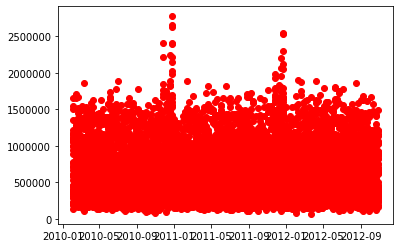

In [25]:
plt.plot(walmartstoredf.DateTimeObj, walmartstoredf.Weekly_Sales, 'ro')
plt.show()

In [28]:
walmartstoredf['IsHolidayInt'] = [int(x) for x in list(walmartstoredf.IsHoliday)]
walmartstoredf.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week,IsHolidayInt
0,1,2010-02-05,1112466.82,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0,0
1,1,2010-02-12,792483.02,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0,1
2,1,2010-02-19,799708.54,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0,0
3,1,2010-02-26,968441.71,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0,0
4,1,2010-03-05,1021063.19,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0,0


In [29]:
walmartstoredf.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [31]:
train_WM, test_WM = train_test_split(walmartstoredf, test_size=0.3,random_state=42)

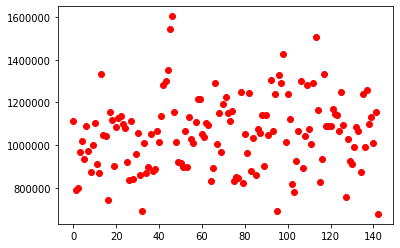

In [32]:
plt.plot(walmartstoredf[(walmartstoredf.Store==1)].Week, walmartstoredf[(walmartstoredf.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [33]:
XTrain = train_WM[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHolidayInt']]
YTrain = train_WM['Weekly_Sales']

In [34]:
XTest = test_WM[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHolidayInt']]
YTest = test_WM['Weekly_Sales']

In [35]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [36]:
YHatTest = wmLinear.predict(XTest)

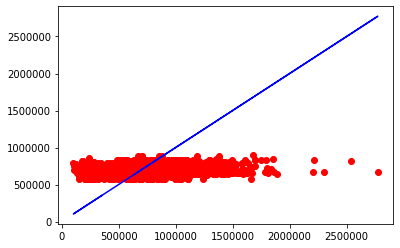

In [37]:
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()

In [38]:
walmartstoredf['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [40]:
Store_Dummies = pd.get_dummies(walmartstoredf.Store, prefix='Store').iloc[:,1:]
walmartstoredf = pd.concat([walmartstoredf, Store_Dummies], axis=1)
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1,2010-02-05,1112466.82,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2010-02-12,792483.02,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1,2010-02-19,799708.54,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0,...,0,0,0,0,0,0,0,0,0,0
3,1,2010-02-26,968441.71,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0,...,0,0,0,0,0,0,0,0,0,0
4,1,2010-03-05,1021063.19,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
train_WM, test_WM = train_test_split(walmartstoredf, test_size=0.3,random_state=42)
XTrain = train_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,walmartstoredf.shape[1]))]
yTrain = train_WM.Weekly_Sales
                                                    
XTest = test_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,walmartstoredf.shape[1]))]
yTest=test_WM.Weekly_Sales

XTrain.head()

,Temperature,Fuel_Price,CPI,Unemployment,Week,IsHolidayInt,Store_2,Store_3,Store_4,Store_5,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
1288,49.96,2.828,126.496258,9.765,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1115,65.19,3.891,225.062571,5.679,114.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,65.30,2.808,211.038853,6.465,10.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3647,56.94,3.851,135.265267,7.818,72.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1564,86.49,3.638,225.829306,6.334,134.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

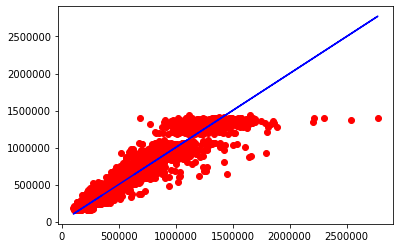

In [44]:
YHatTest = wmLinear.predict(XTest)
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()